## Laboratorio 2
- Diego Cordova 20212
- Andrea Lam 20102

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

In [2]:
dir_datos = './Data/Datos_Rotulos_Trafico/'

In [3]:
trayecto_test = os.path.join(dir_datos, 'prueba.p')
trayecto_train = os.path.join(dir_datos, 'entrenamiento.p')
trayecto_validation = os.path.join(dir_datos, 'validacion.p')

In [4]:
if os.path.exists(trayecto_test):
    print("El archivo prueba.p existe en la ruta especificada.")
else:
    raise Exception("El archivo prueba.p no existe en la ruta especificada.")

El archivo prueba.p existe en la ruta especificada.


In [5]:
if os.path.exists(trayecto_train):
    print("El archivo entrenamiento.p existe en la ruta especificada.")
else:
    raise Exception("El archivo entrenamiento.p no existe en la ruta especificada.")

El archivo entrenamiento.p existe en la ruta especificada.


### Obtener Data

In [6]:
import pickle

def get_data(filePath):
    with open(filePath, "rb") as archivo:
        objeto_cargado = pickle.load(archivo)

    y = objeto_cargado.pop('labels')
    x = objeto_cargado.pop('features')
    return x, y

X_train, y_train = get_data(os.path.join(dir_datos, 'entrenamiento.p'))
X_test, y_test = get_data(os.path.join(dir_datos, 'prueba.p'))
X_validation, y_validation = get_data(os.path.join(dir_datos, 'validacion.p'))

### Se validan las dimensiones de las imagenes

In [7]:
last = X_train[0].shape
diferencia = False

for img in X_train:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de entreno')

else:
    print('No hay dimensiones diferentes en las imagenes de entreno')

last = X_test[0].shape
diferencia = False

for img in X_test:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de testing')

else:
    print('No hay dimensiones diferentes en las imagenes de testing')

last = X_validation[0].shape
diferencia = False

for img in X_validation:
    if img.shape != last:
        diferencia = True

if diferencia:
    print('Hay dimensiones diferentes en las imagenes de Validacion')

else:
    print('No hay dimensiones diferentes en las imagenes de Validacion')


No hay dimensiones diferentes en las imagenes de entreno
No hay dimensiones diferentes en las imagenes de testing
No hay dimensiones diferentes en las imagenes de Validacion


### Normalizacion

In [8]:
X_train[0].min()

19

In [9]:
X_train[0].max()

113

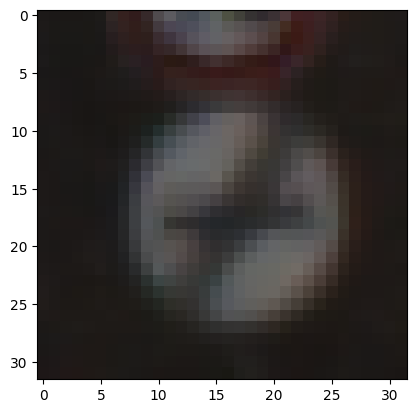

In [10]:
plt.imshow(X_train[0])

In [11]:
X_train = X_train / 255
X_test = X_test / 255
X_validation = X_validation / 255

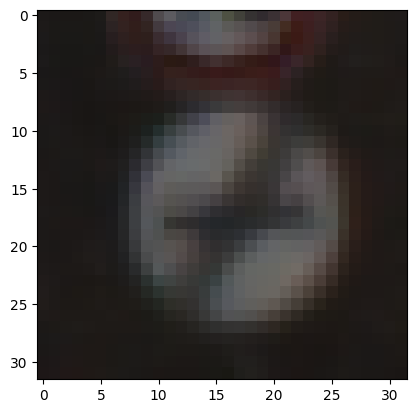

In [12]:
plt.imshow(X_train[0])

In [13]:
X_train.shape

(34799, 32, 32, 3)

### Definicion del modelo

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Conv3D

In [15]:
modelo = Sequential()

# Capa convolucional
modelo.add(Conv2D(filters = 32, kernel_size = (5, 5), input_shape = (32, 32, 3), activation = 'relu'))

# Capa pooling
modelo.add(MaxPool2D(pool_size = (2, 2)))

# Capa convolucional
modelo.add(Conv2D(filters = 16, kernel_size = (5, 5), input_shape = (32, 32, 3), activation = 'relu'))

# Capa pooling
modelo.add(MaxPool2D(pool_size = (2, 2)))

# Capa aplanada
modelo.add(Flatten())

# Hidden layers
modelo.add(Dense(120, activation = 'relu'))
modelo.add(Dense(84, activation = 'relu'))

# Clasificadora (softmax)
modelo.add(Dense(43, activation='softmax'))

In [16]:
import tensorflow as tf
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss = tf.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

modelo.build((32, 32, 3))
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        12816     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

Total params: 77187 (301.51 KB)
Trainable params: 77187 (301.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Entreno del modelo

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
detencion_temprana = EarlyStopping(monitor = 'val_loss', patience = 2)

modelo.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_data = (X_test, y_test),
    callbacks = [detencion_temprana]
)

Epoch 1/10
1088/1088 [==============================] - 29s 25ms/step - loss: 1.0609 - accuracy: 0.7110 - val_loss: 0.6544 - val_accuracy: 0.8548
Epoch 2/10
1088/1088 [==============================] - 26s 24ms/step - loss: 0.1852 - accuracy: 0.9505 - val_loss: 0.5396 - val_accuracy: 0.8856
Epoch 3/10
1088/1088 [==============================] - 30s 27ms/step - loss: 0.0991 - accuracy: 0.9728 - val_loss: 0.5405 - val_accuracy: 0.9090
Epoch 4/10
1088/1088 [==============================] - 34s 31ms/step - loss: 0.0710 - accuracy: 0.9807 - val_loss: 0.5652 - val_accuracy: 0.9117


### Testing

,loss,accuracy,val_loss,val_accuracy
0,1.060907,0.711026,0.654361,0.854790
1,0.185201,0.950545,0.539649,0.885590
2,0.099129,0.972844,0.540528,0.909026
3,0.071002,0.980747,0.565187,0.911718


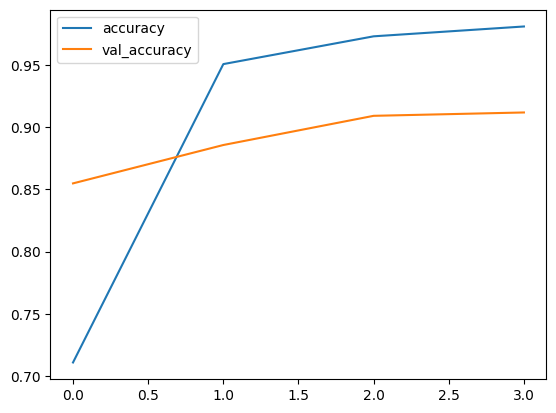

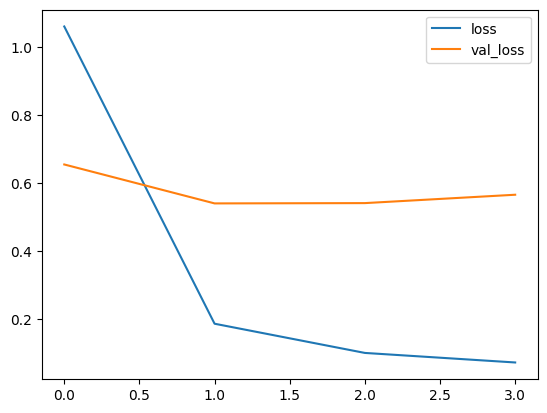

In [18]:
modelo.metrics_names
metricas = pd.DataFrame(modelo.history.history)
metricas[['accuracy', 'val_accuracy']].plot()
metricas[['loss', 'val_loss']].plot()
metricas.head()

In [19]:
print(modelo.metrics_names)
print(modelo.evaluate(X_test, y_test, verbose = 0))

['loss', 'accuracy']
[0.5651873350143433, 0.9117181301116943]


In [22]:
import numpy as np
from sklearn.metrics import classification_report

# Realizar predicciones con el modelo
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Obtener las clases predichas

# Calcular métricas de evaluación
report = classification_report(y_test, y_pred_classes)
print(report)

395/395 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        60
           1       0.93      0.95      0.94       720
           2       0.88      0.97      0.92       750
           3       0.88      0.92      0.90       450
           4       0.98      0.92      0.95       660
           5       0.87      0.88      0.88       630
           6       1.00      0.71      0.83       150
           7       0.96      0.82      0.88       450
           8       0.90      0.91      0.91       450
           9       0.94      0.99      0.97       480
          10       0.97      0.97      0.97       660
          11       0.89      0.93      0.91       420
          12       0.92      0.95      0.93       690
          13       0.98      0.98      0.98       720
          14       0.99      1.00      0.99       270
          15       0.75      0.98      0.85       210
          16       0.97   

Interpretación de Resultados (5 puntos): Explicación de cómo el modelo se desempeña en diferentes clases.

Los resultados muestran que el modelo está aprendiendo de manera efectiva y logrando una alta precisión tanto en los datos de entrenamiento como en los datos de validación. Sin embargo, es importante considerar algunas cosas:

- Puede haber una ligera señal de sobreajuste (overfitting) ya que la precisión en el conjunto de entrenamiento es significativamente más alta que en el conjunto de validación.
- Sería útil evaluar el modelo en un conjunto de datos completamente nuevo (conjunto de prueba) para obtener una evaluación más completa de su rendimiento.

Mejoras y Experimentación (10 puntos)

Descripción de al menos un experimento para mejorar el rendimiento del modelo

Se puede experimentar aumentando el numero de data para entrenamiento, ademas de ajustar los hiperparametros para ver que ajustes se adaptan mejor al modelo, datos y computador usado.


Reflexión sobre Resultados (5 puntos): Reflexión sobre los resultados de los experimentos y cómo podrían aplicarse en situaciones reales.

Pues como se menciono antes al revisar los resultados y como esta la marca de loss, accuracy y sus respectivos valores, se mostro un buen desempeño para el entrenamiento del modelo lo cual se puede verificar en las graficas anteriores